In [1]:
import pandas as pd 

In [3]:
pip install xlrd

     |████████████████████████████████| 96 kB 6.4 MB/s eta 0:00:01
You should consider upgrading via the '/Users/Nicolas/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
file_path = "ussuperstore.xls"  
df = pd.read_excel(file_path)

In [ ]:
csv_path = "ussuperstore.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")

In [ ]:
print(f"Le fichier a été converti avec succès en : {csv_path}")

In [5]:
import pandas as pd


csv_path = "ussuperstore.csv"
df = pd.read_csv(csv_path)


print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'ussuperstore.csv'

In [6]:
import os
print(os.listdir())  # Affiche tous les fichiers disponibles



['ussuperstore.xls', 'exercicesxp.ipynb']


In [7]:
import pandas as pd

# Vérifie que le fichier Excel existe
file_path = "ussuperstore.xls"

# Charger le fichier Excel
df = pd.read_excel(file_path)

# Sauvegarder en CSV
csv_path = "ussuperstore.csv"
df.to_csv(csv_path, index=False, encoding="utf-8")

print(f"Le fichier a été converti avec succès en : {csv_path}")


Le fichier a été converti avec succès en : ussuperstore.csv


In [8]:
import os
print(os.listdir())  # Liste les fichiers présents


['ussuperstore.xls', 'ussuperstore.csv', 'exercicesxp.ipynb']


In [9]:
df = pd.read_csv(csv_path)
print(df.head())  # Vérifier les premières lignes


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [10]:
sales_by_state = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
print(sales_by_state.head(10))  # Top 10 des États avec le plus de ventes


State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


In [12]:
ny_ca_sales = df[df["State"].isin(["New York", "California"])].groupby("State")[["Sales", "Profit"]].sum()
print(ny_ca_sales)


                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


In [13]:
ny_customers = df[df["State"] == "New York"].groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
print(ny_customers.head(5))  # Top 5 clients de New York


Customer Name
Tom Ashbrook        13723.498
Peter Fuller         7678.228
Seth Vernon          7359.918
Tom Boeckenhauer     6999.960
Greg Tran            6712.744
Name: Sales, dtype: float64


In [14]:
df_customers = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)
total_profit = df_customers.sum()
df_customers_cumsum = df_customers.cumsum() / total_profit

top_20_percent_customers = df_customers_cumsum[df_customers_cumsum <= 0.8]
print(f"Nombre de clients représentant 80% du profit : {len(top_20_percent_customers)}")


Nombre de clients représentant 80% du profit : 152


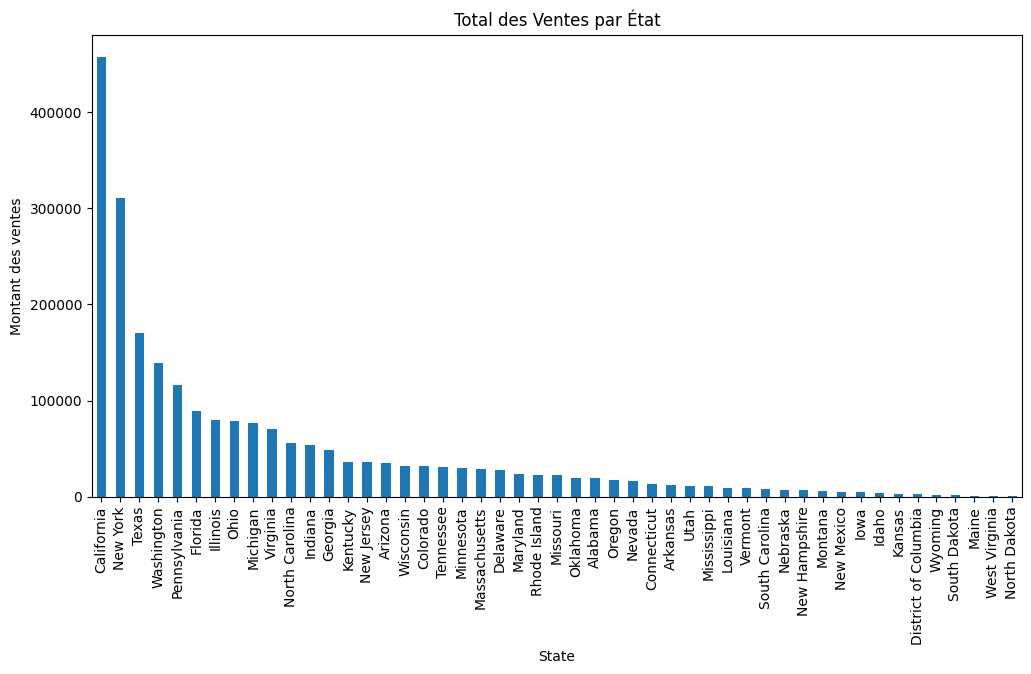

In [15]:
import matplotlib.pyplot as plt

sales_by_state.plot(kind='bar', figsize=(12,6), title="Total des Ventes par État")
plt.ylabel("Montant des ventes")
plt.show()


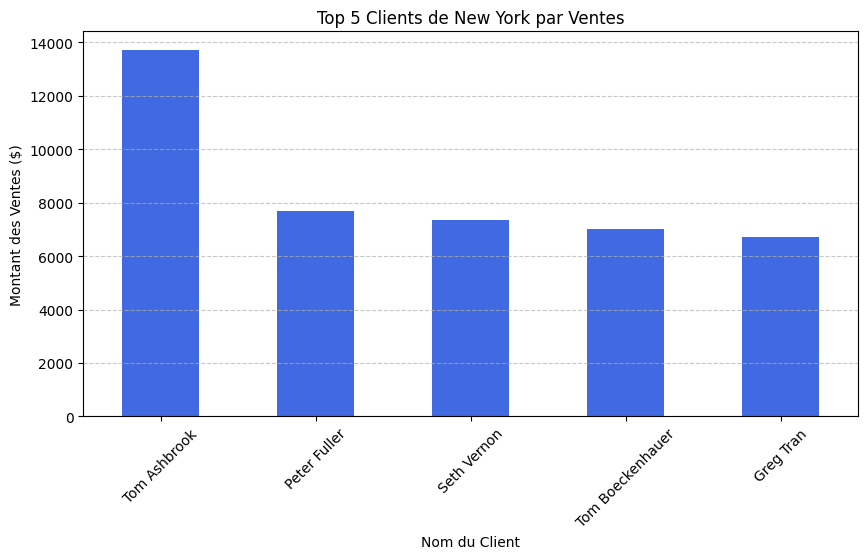

In [16]:
import matplotlib.pyplot as plt

# Création du graphique
plt.figure(figsize=(10,5))
ny_customers.head(5).plot(kind='bar', color='royalblue')

# Personnalisation
plt.title("Top 5 Clients de New York par Ventes")
plt.xlabel("Nom du Client")
plt.ylabel("Montant des Ventes ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Affichage
plt.show()


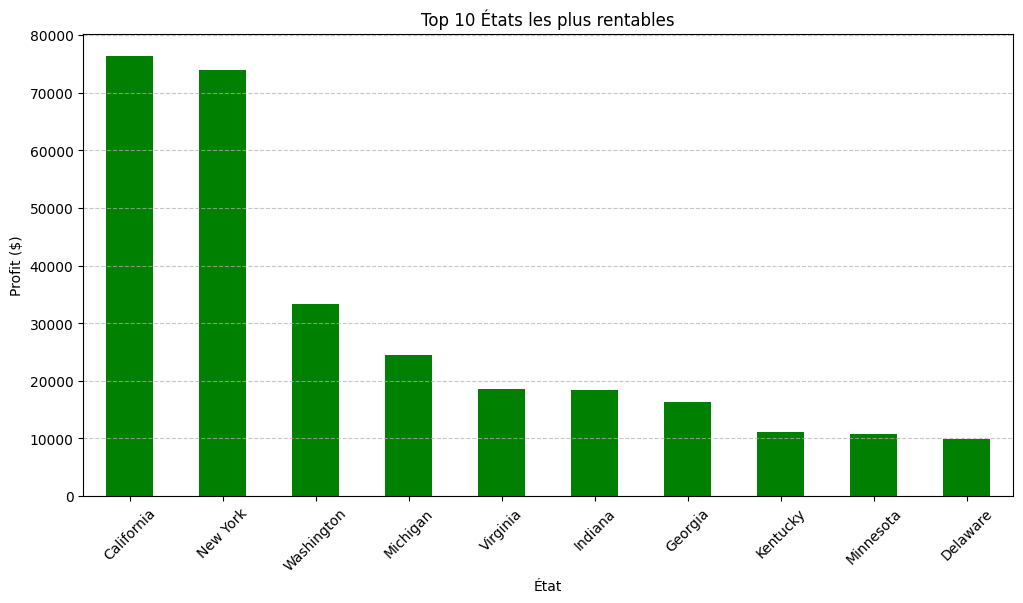

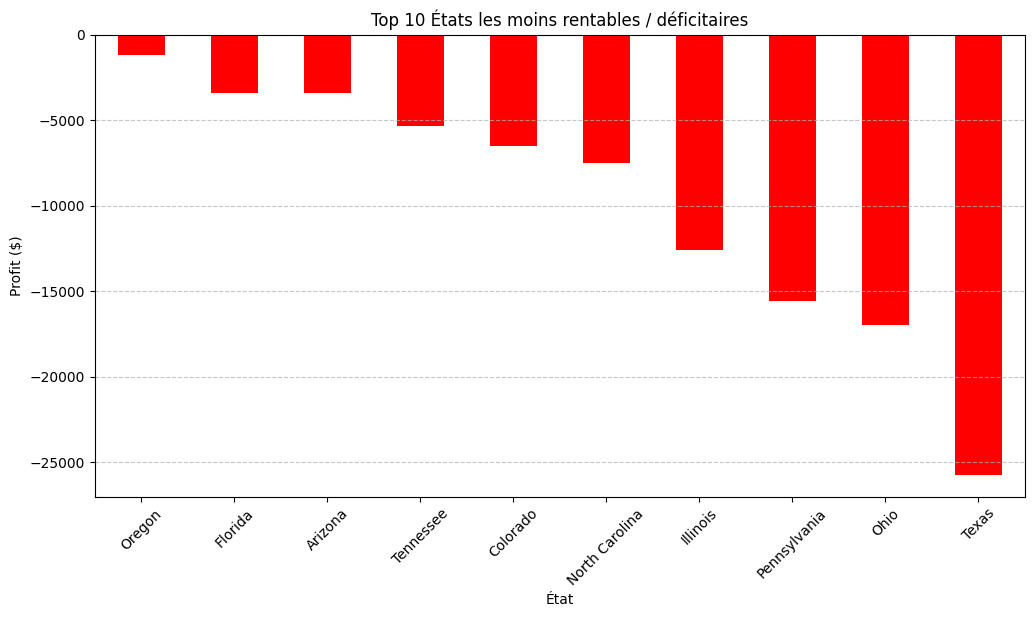

In [17]:
import matplotlib.pyplot as plt

# Calculer le profit total par État
profit_by_state = df.groupby("State")["Profit"].sum().sort_values(ascending=False)

# Visualisation des 10 États les plus rentables
plt.figure(figsize=(12,6))
profit_by_state.head(10).plot(kind="bar", color="green")
plt.title("Top 10 États les plus rentables")
plt.ylabel("Profit ($)")
plt.xlabel("État")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualisation des 10 États les moins rentables (ou en déficit)
plt.figure(figsize=(12,6))
profit_by_state.tail(10).plot(kind="bar", color="red")
plt.title("Top 10 États les moins rentables / déficitaires")
plt.ylabel("Profit ($)")
plt.xlabel("État")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Nombre de clients représentant 80% du profit : 152


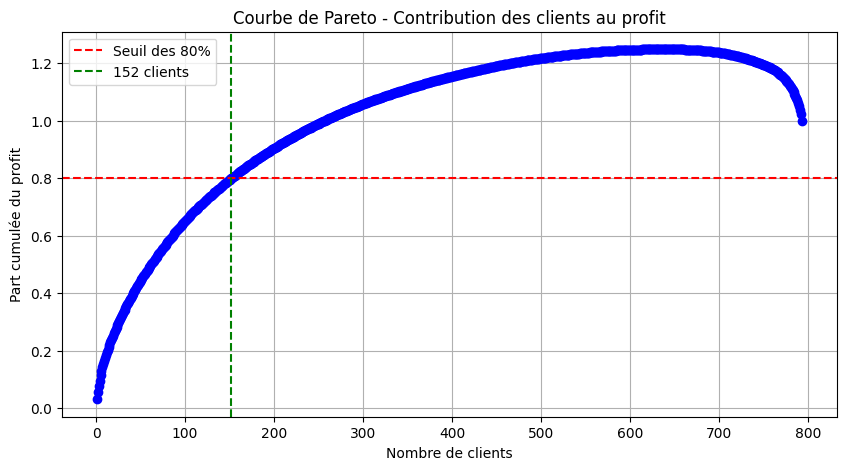

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Regrouper les profits par client et trier par ordre décroissant
df_customers = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

# Calculer le profit total
total_profit = df_customers.sum()

# Calculer la part cumulée du profit
df_customers_cumsum = df_customers.cumsum() / total_profit

# Trouver le nombre de clients représentant 80% du profit
pareto_threshold = df_customers_cumsum[df_customers_cumsum <= 0.8]
pareto_count = len(pareto_threshold)

print(f"Nombre de clients représentant 80% du profit : {pareto_count}")

# Visualisation de la courbe de Pareto
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(df_customers) + 1), df_customers_cumsum, marker="o", linestyle="-", color="blue")
plt.axhline(y=0.8, color='r', linestyle='--', label="Seuil des 80%")
plt.axvline(x=pareto_count, color='g', linestyle='--', label=f"{pareto_count} clients")
plt.title("Courbe de Pareto - Contribution des clients au profit")
plt.xlabel("Nombre de clients")
plt.ylabel("Part cumulée du profit")
plt.legend()
plt.grid()
plt.show()


Top 20 villes par Ventes :
City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64

Top 20 villes par Profit :
City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus          5

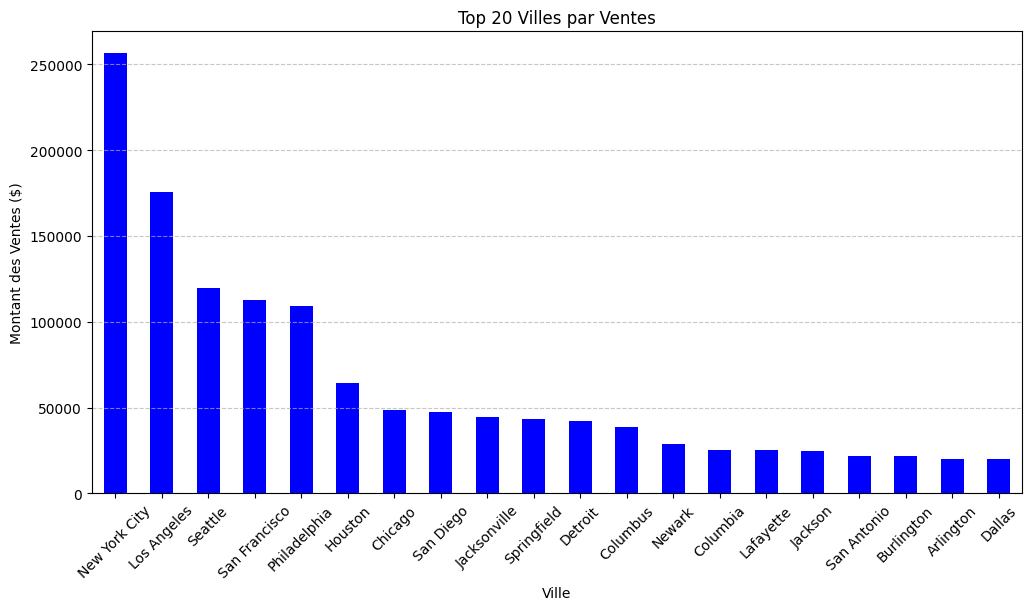

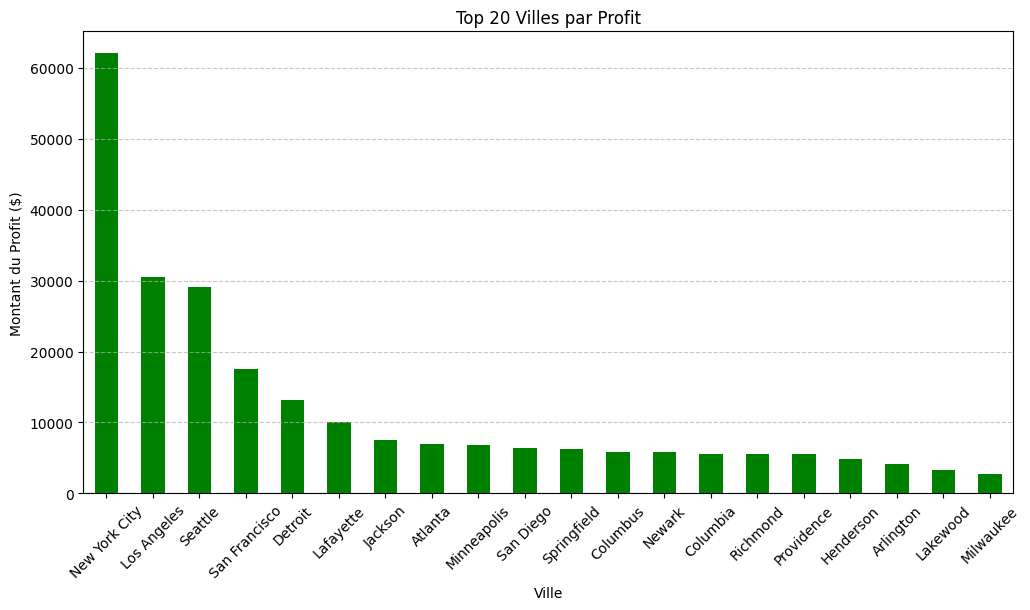

In [19]:

import matplotlib.pyplot as plt

# Top 20 villes en termes de ventes
top_cities_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(20)

# Top 20 villes en termes de profit
top_cities_profit = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(20)

# Affichage des résultats
print("Top 20 villes par Ventes :")
print(top_cities_sales)

print("\nTop 20 villes par Profit :")
print(top_cities_profit)

# Visualisation des ventes par ville
plt.figure(figsize=(12,6))
top_cities_sales.plot(kind="bar", color="blue")
plt.title("Top 20 Villes par Ventes")
plt.ylabel("Montant des Ventes ($)")
plt.xlabel("Ville")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Visualisation des profits par ville
plt.figure(figsize=(12,6))
top_cities_profit.plot(kind="bar", color="green")
plt.title("Top 20 Villes par Profit")
plt.ylabel("Montant du Profit ($)")
plt.xlabel("Ville")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [20]:
# Identifier les États déficitaires
negative_profit_states = df.groupby("State")["Profit"].sum().sort_values()
negative_profit_states = negative_profit_states[negative_profit_states < 0]

print("États en déficit :")
print(negative_profit_states)

# Identifier les villes déficitaires
negative_profit_cities = df.groupby("City")["Profit"].sum().sort_values()
negative_profit_cities = negative_profit_cities[negative_profit_cities < 0]

print("\nVilles en déficit :")
print(negative_profit_cities)


États en déficit :
State
Texas            -25729.3563
Ohio             -16971.3766
Pennsylvania     -15559.9603
Illinois         -12607.8870
North Carolina    -7490.9122
Colorado          -6527.8579
Tennessee         -5341.6936
Arizona           -3427.9246
Florida           -3399.3017
Oregon            -1190.4705
Name: Profit, dtype: float64

Villes en déficit :
City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
                   ...    
Ormond Beach       -1.9656
Pensacola          -1.4760
Elyria             -1.3984
Altoona            -1.1835
Hickory            -1.0956
Name: Profit, Length: 116, dtype: float64


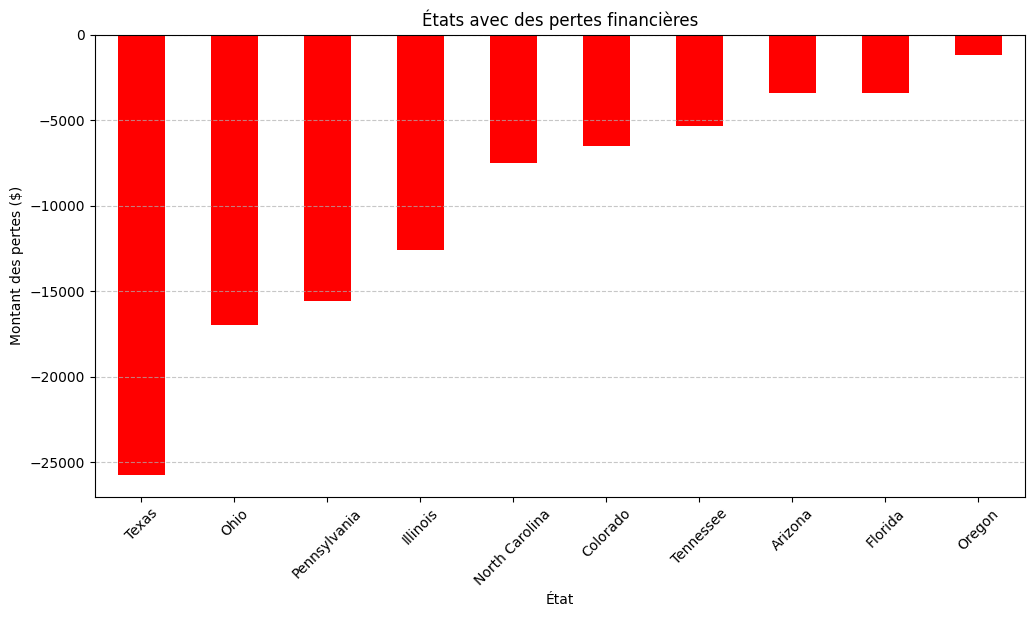

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
negative_profit_states.plot(kind="bar", color="red")
plt.title("États avec des pertes financières")
plt.ylabel("Montant des pertes ($)")
plt.xlabel("État")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [22]:
negative_profit_customers = df.groupby("Customer Name")["Profit"].sum().sort_values()
negative_profit_customers = negative_profit_customers[negative_profit_customers < 0]

print("Clients déficitaires :")
print(negative_profit_customers)


Clients déficitaires :
Customer Name
Cindy Stewart     -6626.3895
Grant Thornton    -4108.6589
Luke Foster       -3583.9770
Sharelle Roach    -3333.9144
Henry Goldwyn     -2797.9635
                     ...    
Thais Sissman        -3.3156
Adrian Hane          -2.3146
Mitch Gastineau      -1.2453
Paul Lucas           -0.7527
Jasper Cacioppo      -0.3556
Name: Profit, Length: 155, dtype: float64


In [23]:
import matplotlib.pyplot as plt

# Top 20 clients en ventes
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

# Affichage des résultats
print("Top 20 clients par ventes :")
print(top_customers_sales)

# Visualisation des 20 meilleurs clients en termes de ventes
plt.figure(figsize=(12,6))
top_customers_sales.plot(kind="bar", color="royalblue")
plt.title("Top 20 Clients par Ventes")
plt.ylabel("Montant des Ventes ($)")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha


SyntaxError: unexpected EOF while parsing (3530725491.py, line 17)

In [24]:
import matplotlib.pyplot as plt

# Top 20 clients en ventes
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

# Affichage des résultats
print("Top 20 clients par ventes :")
print(top_customers_sales)

# Visualisation des 20 meilleurs clients en termes de ventes
plt.figure(figsize=(12,6))
top_customers_sales.plot(kind="bar", color="royalblue")
plt.title("Top 20 Clients par Ventes")
plt.ylabel("Montant des Ventes ($)")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=


SyntaxError: unexpected EOF while parsing (795321310.py, line 17)

Top 20 clients par ventes :
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


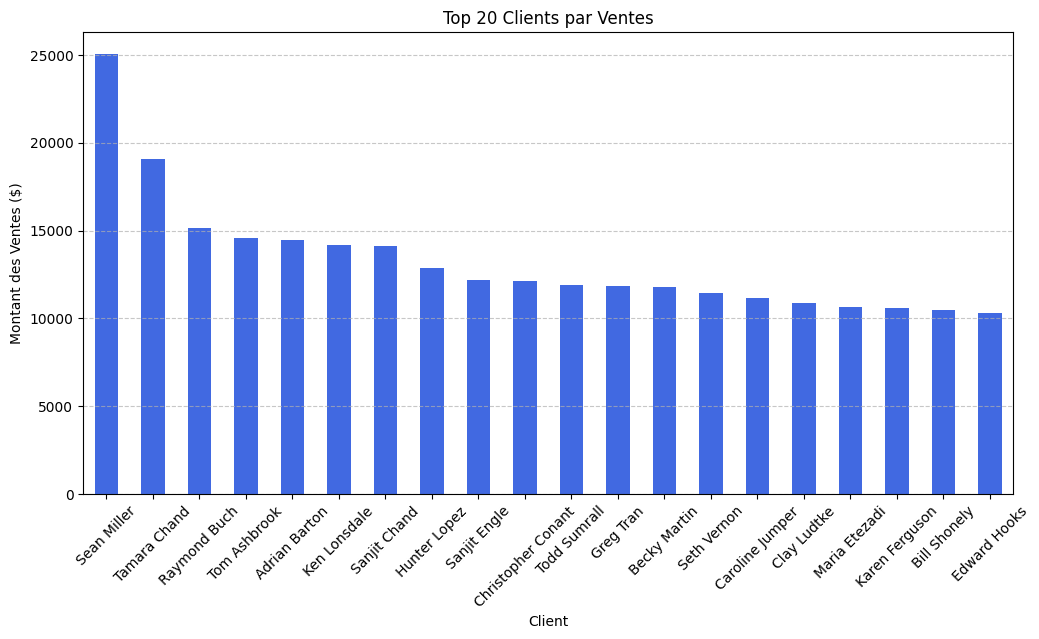

In [25]:
import matplotlib.pyplot as plt

# Top 20 clients en ventes
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

# Affichage des résultats
print("Top 20 clients par ventes :")
print(top_customers_sales)

# Visualisation des 20 meilleurs clients en termes de ventes
plt.figure(figsize=(12,6))
top_customers_sales.plot(kind="bar", color="royalblue")
plt.title("Top 20 Clients par Ventes")
plt.ylabel("Montant des Ventes ($)")
plt.xlabel("Client")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)  # ✅ Correction ici
plt.show()


Nombre de clients représentant 80% des ventes : 395


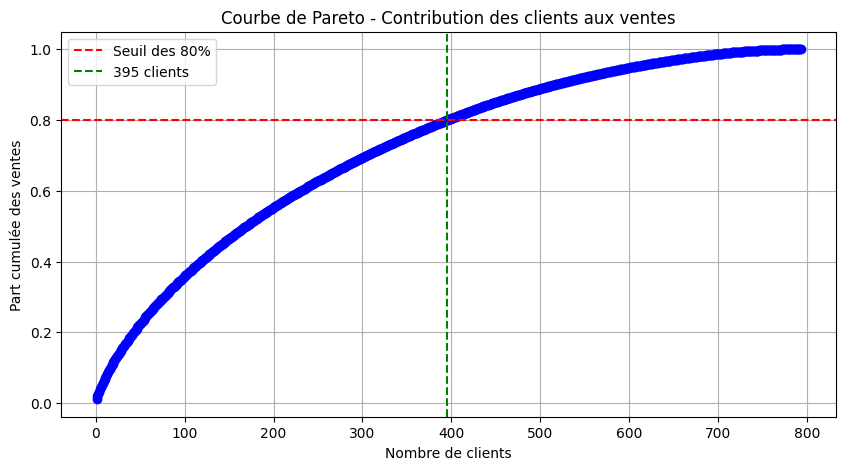

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Regrouper les ventes par client et trier
df_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)

# Calcul du total des ventes
total_sales = df_customers_sales.sum()

# Calcul de la part cumulée des ventes
df_customers_sales_cumsum = df_customers_sales.cumsum() / total_sales

# Trouver le nombre de clients représentant 80% des ventes
pareto_threshold = df_customers_sales_cumsum[df_customers_sales_cumsum <= 0.8]
pareto_count = len(pareto_threshold)

print(f"Nombre de clients représentant 80% des ventes : {pareto_count}")

# Visualisation de la courbe de Pareto
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, len(df_customers_sales) + 1), df_customers_sales_cumsum, marker="o", linestyle="-", color="blue")
plt.axhline(y=0.8, color='r', linestyle='--', label="Seuil des 80%")
plt.axvline(x=pareto_count, color='g', linestyle='--', label=f"{pareto_count} clients")
plt.title("Courbe de Pareto - Contribution des clients aux ventes")
plt.xlabel("Nombre de clients")
plt.ylabel("Part cumulée des ventes")
plt.legend()
plt.grid()
plt.show()
